In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter
from matplotlib.collections import LineCollection

/home/chinmay/.local/lib/python3.10/site-packages/matplotlib/projections/__init__.py:63: UserWarning: Unable to import Axes3D. This may be due to multiple versions of Matplotlib being installed (e.g. as a system package and as a pip package). As a result, the 3D projection is not available.
  warnings.warn("Unable to import Axes3D. This may be due to multiple versions of "


In [2]:
# function to search for max two bonds

def count_bonds(bond_list):
    flat_list = [x for pair in bond_list for x in pair]
    counts = Counter(flat_list)
    counts = dict(sorted(counts.items()))
    return counts

# check intersection of two segments

#def check_intersection(bond_list):
    

In [9]:
phi = 0.5
L = 30
n_part = int(phi*L*L/np.pi)
radius = 1
r_cut = 3.5
r_cut_sq = r_cut**2

prob_bond = 0.6

print("Total particles :", n_part)

list_pos_x = np.empty((n_part,))*np.nan
list_pos_y = np.empty((n_part,))*np.nan 

bonds = []
pos = []
deg_bonds = np.zeros(n_part, dtype=int)

cnt = 0
while (cnt < n_part):
    
    x,y = np.random.rand(2)*L

    overlap = False
    for ii in range(0,cnt):
        r_sq = (x - list_pos_x[ii])**2 + (y - list_pos_y[ii])**2
        if(r_sq <= 4*radius**2):
            overlap = True
            break

    if overlap:
        continue
    
    list_pos_x[cnt] = x
    list_pos_y[cnt] = y

    for ii in range(0,cnt):
        dist_x = list_pos_x[cnt] - list_pos_x[ii]
        dist_y = list_pos_y[cnt] - list_pos_y[ii]

        dist_sq = dist_x**2 + dist_y**2
        #print(dist_sq<r_cut_sq)
        
        if(dist_sq <= r_cut_sq):
            bond_counts = count_bonds(bonds)
            
            if(deg_bonds[ii] < 2 and deg_bonds[cnt] < 2):
                if(np.random.rand()<prob_bond):
                    bonds.append([ii,cnt])
                    deg_bonds[ii] += 1
                    deg_bonds[cnt] += 1
                
                # if(ii in bond_counts):
                #     if(bond_counts[ii] <= 2):
                #         bonds.append([ii,cnt])
                #     else:
                #         continue
                # else:
                #     bonds.append([ii,cnt])
                
    cnt = cnt+1

list_pos = np.column_stack((list_pos_x,list_pos_y))
print(bonds)

Total particles : 143
[[5, 6], [6, 7], [1, 8], [8, 15], [10, 18], [13, 19], [22, 28], [4, 29], [4, 33], [24, 34], [24, 36], [34, 36], [9, 38], [11, 41], [33, 42], [9, 44], [38, 44], [3, 46], [0, 48], [37, 48], [2, 50], [11, 50], [26, 54], [15, 56], [0, 60], [37, 62], [39, 63], [61, 64], [39, 68], [28, 70], [40, 70], [3, 73], [58, 73], [1, 74], [35, 74], [67, 76], [7, 77], [13, 77], [30, 78], [55, 78], [16, 79], [23, 80], [41, 80], [76, 81], [46, 82], [2, 84], [31, 84], [68, 85], [14, 86], [58, 86], [54, 87], [45, 90], [5, 91], [47, 92], [89, 92], [42, 93], [52, 93], [88, 94], [12, 96], [17, 96], [17, 97], [26, 97], [40, 100], [85, 100], [32, 101], [72, 101], [19, 102], [90, 102], [71, 103], [87, 103], [30, 104], [18, 105], [104, 105], [53, 106], [21, 107], [27, 107], [45, 108], [62, 109], [47, 110], [23, 111], [61, 111], [10, 112], [59, 113], [32, 114], [99, 117], [51, 119], [69, 119], [66, 120], [82, 122], [79, 123], [16, 124], [57, 125], [21, 127], [67, 127], [20, 128], [55, 129], [6

In [10]:
print(bonds)
print(count_bonds(bonds))
#counts_num = dict(Counter(cnt_bonds(bonds)))

[[5, 6], [6, 7], [1, 8], [8, 15], [10, 18], [13, 19], [22, 28], [4, 29], [4, 33], [24, 34], [24, 36], [34, 36], [9, 38], [11, 41], [33, 42], [9, 44], [38, 44], [3, 46], [0, 48], [37, 48], [2, 50], [11, 50], [26, 54], [15, 56], [0, 60], [37, 62], [39, 63], [61, 64], [39, 68], [28, 70], [40, 70], [3, 73], [58, 73], [1, 74], [35, 74], [67, 76], [7, 77], [13, 77], [30, 78], [55, 78], [16, 79], [23, 80], [41, 80], [76, 81], [46, 82], [2, 84], [31, 84], [68, 85], [14, 86], [58, 86], [54, 87], [45, 90], [5, 91], [47, 92], [89, 92], [42, 93], [52, 93], [88, 94], [12, 96], [17, 96], [17, 97], [26, 97], [40, 100], [85, 100], [32, 101], [72, 101], [19, 102], [90, 102], [71, 103], [87, 103], [30, 104], [18, 105], [104, 105], [53, 106], [21, 107], [27, 107], [45, 108], [62, 109], [47, 110], [23, 111], [61, 111], [10, 112], [59, 113], [32, 114], [99, 117], [51, 119], [69, 119], [66, 120], [82, 122], [79, 123], [16, 124], [57, 125], [21, 127], [67, 127], [20, 128], [55, 129], [69, 129], [14, 130], [1

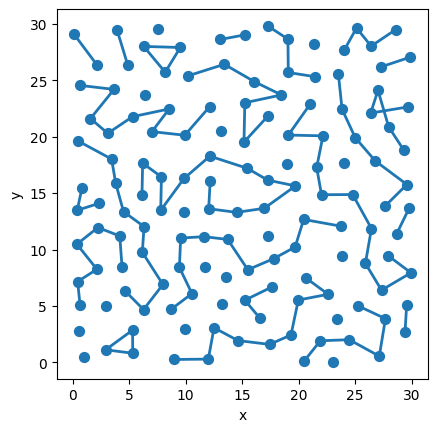

In [11]:


# Positions of nodes (N x 2)
# pos = np.array([
#     [0, 0],
#     [1, 1],
#     [2, 0],
#     [3, 1]
# ], dtype=float)

# Bonds as index pairs
#bonds = [(0, 1), (1, 2), (2, 3)]

# Build segment coordinate list from bonds
segments = [(list_pos[i], list_pos[j]) for (i, j) in bonds]
seg_arr = np.array(segments, dtype=float)

fig, ax = plt.subplots()

# Plot bonds
lc = LineCollection(seg_arr, linewidths=2)
ax.add_collection(lc)

# Plot nodes (optional)
ax.scatter(list_pos[:, 0], list_pos[:, 1], s=50)

ax.autoscale()
ax.set_aspect("equal", adjustable="box")
ax.set_xlabel("x")
ax.set_ylabel("y")

plt.savefig("mixed_polymer_and_gel.png", dpi = 300, format = "png")
plt.savefig("mixed_polymer_and_gel.svg", dpi = 300, format = "svg")
plt.show()
